## Αλγόριθμος με Linear Regression για την πρόβλεψη μετοχών

In [22]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [23]:
symbol = 'AMZN'  # Παράδειγμα με μετοχή Amazon
start_date = '2018-11-30'
end_date = '2023-11-30'
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [24]:
# Καθαρισμός και επεξεργασία δεδομένων
df.dropna(inplace=True) # Διαγραφή απουσιάζουσων τιμών
df['Return'] = df['Close'].pct_change() # Υπολογισμός ημερήσιας απόδοσης
df = df.reset_index()

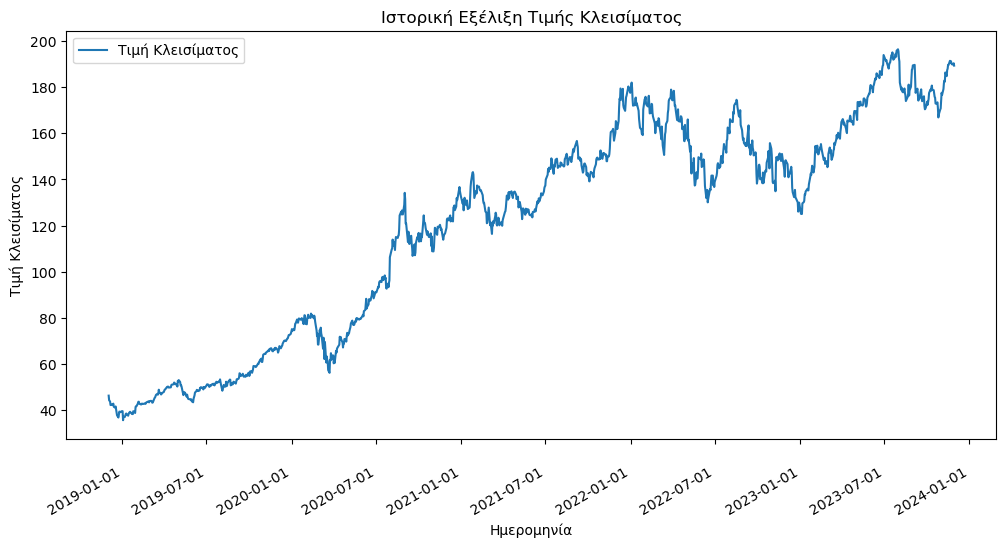

In [34]:
plt.figure(figsize=(12, 6))
# Μετατροπή της στήλης 'Date' σε datetime
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'], label='Τιμή Κλεισίματος')
plt.title('Ιστορική Εξέλιξη Τιμής Κλεισίματος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.legend()
plt.gcf().autofmt_xdate() # rotate στον άξονα x για καλύτερη ανάγνωση των ημερομηνιών

# Βελτιστοποίηση του άξονα χ για να εμφανίζονται μόνο οι μήνες Ιανουάριος και Ιούλιος
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.gca().xaxis.set_tick_params(which='major', pad=15)

plt.show()

In [26]:
# Δημιουργία μεταβλητών για το μοντέλο μηχανικής μάθησης
df['Previous_Close'] = df['Close'].shift(1) # Τιμή κλεισίματος προηγούμενης ημέρας
df.dropna(inplace=True) # Διαγραφή απουσιάζουσων τιμών μετά τη μετατόπιση

In [27]:
# Διαχωρισμός σε σετ εκπαίδευσης και δοκιμής
X = df[['Date', 'Previous_Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [28]:
# Εκπαίδευση του μοντέλου
model = LinearRegression()
model.fit(X_train.drop('Date', axis=1), y_train)

LinearRegression()

In [29]:
# Πρόβλεψη τιμών
predictions = model.predict(X_test.drop('Date', axis=1))

In [30]:
# Αξιολόγηση του μοντέλου
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 5.1452285628148715
MAE: 1.7473207387118779


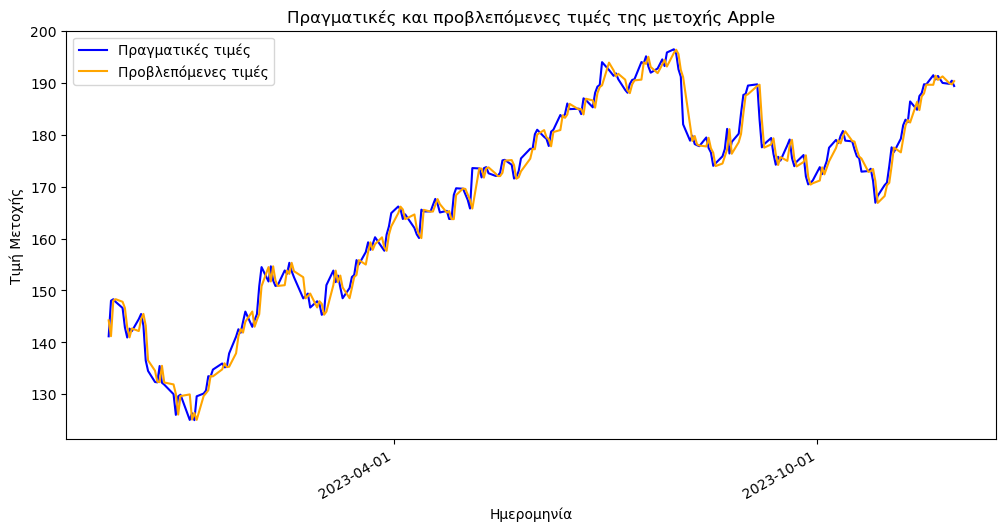

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(X_test['Date'], y_test, color='blue', label='Πραγματικές τιμές')  # Πραγματικές τιμές
plt.plot(X_test['Date'], predictions, color='orange', label='Προβλεπόμενες τιμές')  # Προβλεπόμενες τιμές
plt.title('Πραγματικές και προβλεπόμενες τιμές της μετοχής Amazon')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Μετοχής')
plt.legend()
plt.gcf().autofmt_xdate() 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 

plt.show()